Overview: this file's implementation is based on the notebook titled "job recommendation system initial dataset"  on dataset that has been aumgmented with lot more records, with additional roles specific to IT industry. 

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

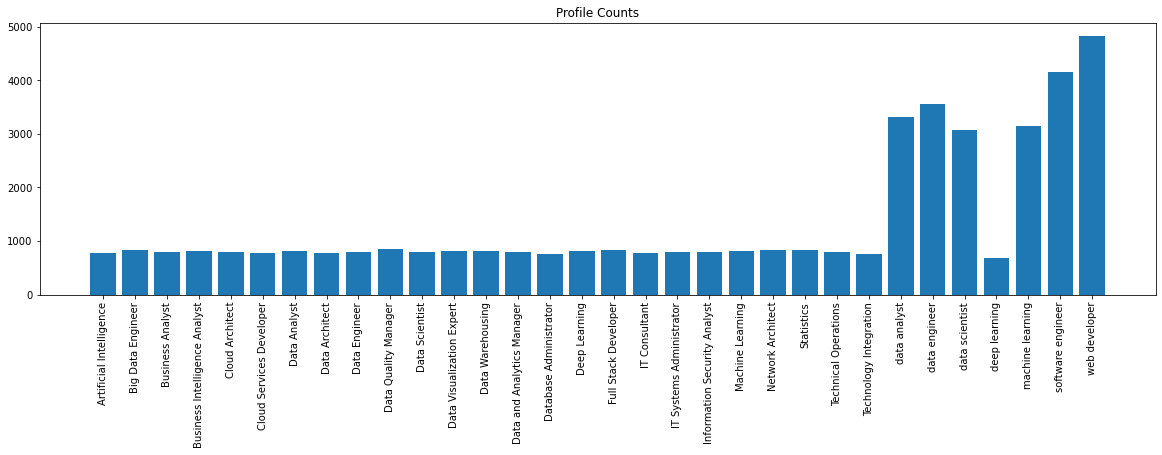

In [39]:
#reading the csv data file and displaying the number of records in each of the job profiles
dataframe=pd.read_csv("DatasetMoreRoles.csv")

aggregated_profiles = dataframe.groupby('Profile').count()
plt.figure(figsize=(20,5))
plt.bar(aggregated_profiles.index, aggregated_profiles["Skills"])
plt.xticks(rotation='vertical')
plt.title("Profile Counts")
plt.show()

In [40]:
# displaying the dataframe 
dataframe

,Profile,Skills,Experience,CompanyName,CompanyRanking
0,data engineer,"javascript,python,react",9,Universal Health Services,281
1,data engineer,"python,sql,hadoop,hbase,hive",11,Allstate,72
2,data engineer,"python,sql,aws,pandas",10,Parker-Hannifin,224
3,data engineer,"hadoop,hive,pig",12,Levi Strauss,495
4,data engineer,"css,html,javascript,python,r,sql,django",7,Oneok,313
...,...,...,...,...,...
42761,Artificial Intelligence,"java,pig,scala,ruby",7,Ulta Beauty,418
42762,Business Analyst,"r,pandas,cassandra,numpy,ajax",6,Brighthouse Financial,457
42763,Statistics,"hive,aws,numpy,hadoop,scala",6,Thrivent Financial for Lutherans,368
42764,Data Quality Manager,"scala,hive,django,hbase",5,Qualcomm,126


In [41]:
# collecting a unique set of skills and companies from dataframe
unique_skills_set = set ()
unique_skills_index = {}

unique_companies_set = set ()
unique_company_index = {}

for index in dataframe.index:
    unique_skills_set = unique_skills_set.union(dataframe.loc[index, "Skills"].split(","))
    unique_companies_set = unique_companies_set.union([dataframe.loc[index, "CompanyName"]])
unique_skills_set = list(unique_skills_set)
unique_companies_set = list(unique_companies_set)

for i in range(len(unique_skills_set)):
    unique_skills_index[unique_skills_set[i]] = i
for j in range(len(unique_companies_set)):
    unique_company_index[unique_companies_set[j]] = i + j

In [42]:
#based on unique skills, dividing dataframe into X and y, for every record, columns of unique skills updated, each skill will 
# have 1 if skill is present for that row otherwise 0

X = np.zeros((len(dataframe), len(unique_skills_set) 
              # + len(unique_companies_set) + 2
             ))
y = np.array([i for i in dataframe["Profile"]])

experience_i = len(unique_skills_set) + len(unique_companies_set)
company_ranking_i = len(unique_skills_set) + len(unique_companies_set) + 1
for index in dataframe.index:
    for skill in dataframe.loc[index, "Skills"].split(","):
        X[index, unique_skills_index[skill]] += 1
#     X[index, unique_company_index[dataframe.loc[index, "CompanyName"]]] += 1
#     X[index, experience_i] = dataframe.loc[index, "Experience"]
#     X[index, company_ranking_i] = dataframe.loc[index, "CompanyRanking"]

# X[:, experience_i] = (X[:, experience_i] - X[:, experience_i].min()) / (X[:, company_ranking_i].max() - X[:, company_ranking_i].min())
# X[:, company_ranking_i] = (X[:, company_ranking_i] - X[:, company_ranking_i].min()) / (X[:, company_ranking_i].max() - X[:, company_ranking_i].min())

print("X ", X.shape)
print("y ", y.shape)

X  (42766, 44)
y  (42766,)


In [43]:
# displaying the dataframe
pd.DataFrame(columns=unique_skills_set, data=X)

,css,r,haskell,c#,ajax,sql,python,angular,perl,hive,...,tensorflow,hbase,asp.net,julia,react,c++,jquery,pig,pandas,nltk
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42762,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# printing all skills
print("no of skills : ",len(unique_skills_set))
print(unique_skills_set)

no of skills :  44
['css', 'r', 'haskell', 'c#', 'ajax', 'sql', 'python', 'angular', 'perl', 'hive', 'sas', 'rails', 'octave', 'spark', 'cassandra', 'numpy', 'matlab', 'mysql', 'ruby', 'linux', 'hadoop', 'laravel', 'scala', 'postgresql', 'java', 'php', 'html', 'node', 'mongodb', 'mvc', 'lua', 'javascript', 'django', 'aws', 'tensorflow', 'hbase', 'asp.net', 'julia', 'react', 'c++', 'jquery', 'pig', 'pandas', 'nltk']


In [45]:
# printing all companies
print("no of companies : ",len(unique_companies_set))
print(unique_companies_set)

no of companies :  500
['HCA Healthcare', 'Molina Healthcare', 'Devon Energy', 'TD Ameritrade Holding', 'Live Nation Entertainment', 'Dean Foods', 'Advance Auto Parts', 'Beacon Roofing Supply', 'W.W. Grainger', 'Visa', 'PulteGroup', 'Williams', 'Pacific Life', 'Howmet Aerospace', 'Ingredion', 'Discover Financial Services', 'United States Steel', 'PayPal Holdings', 'Southern', 'AECOM', 'J.B. Hunt Transport Services', 'Alaska Air Group', 'Intercontinental Exchange', 'Hartford Financial Services Group', 'Omnicom Group', 'Occidental Petroleum', 'CBRE Group', 'Westinghouse Air Brake', 'Publix Super Markets', "Land O'Lakes", 'Berry Global Group', 'Avnet', 'FedEx', 'Erie Insurance Group', 'US Foods Holding', 'Asbury Automotive Group', 'Discovery', 'Raymond James Financial', 'IQVIA Holdings', 'Raytheon Technologies', 'WestRock', 'Eastman Chemical', 'NRG Energy', 'Thermo Fisher Scientific', 'Ameriprise Financial', 'Hanesbrands', 'USAA', 'Procter & Gamble', 'Farmers Insurance Exchange', 'Fortune

In [46]:
# keeping a copy for visializing the data and convertting skills column as list for each row
visualize_data_set=dataframe.copy()
visualize_data_set.drop(['Experience', 'CompanyName','CompanyRanking'], axis=1, inplace=True)
visualize_data_set['Skills']=visualize_data_set['Skills'].str.split(",")

In [47]:
visualize_data_set

,Profile,Skills
0,data engineer,"[javascript, python, react]"
1,data engineer,"[python, sql, hadoop, hbase, hive]"
2,data engineer,"[python, sql, aws, pandas]"
3,data engineer,"[hadoop, hive, pig]"
4,data engineer,"[css, html, javascript, python, r, sql, django]"
...,...,...
42761,Artificial Intelligence,"[java, pig, scala, ruby]"
42762,Business Analyst,"[r, pandas, cassandra, numpy, ajax]"
42763,Statistics,"[hive, aws, numpy, hadoop, scala]"
42764,Data Quality Manager,"[scala, hive, django, hbase]"


In [48]:
count_of_skills={uniqueSkill: [0]*len(visualize_data_set['Skills'])for uniqueSkill in unique_skills_set}
print(count_of_skills.keys())
print(len(count_of_skills.keys()))

dict_keys(['css', 'r', 'haskell', 'c#', 'ajax', 'sql', 'python', 'angular', 'perl', 'hive', 'sas', 'rails', 'octave', 'spark', 'cassandra', 'numpy', 'matlab', 'mysql', 'ruby', 'linux', 'hadoop', 'laravel', 'scala', 'postgresql', 'java', 'php', 'html', 'node', 'mongodb', 'mvc', 'lua', 'javascript', 'django', 'aws', 'tensorflow', 'hbase', 'asp.net', 'julia', 'react', 'c++', 'jquery', 'pig', 'pandas', 'nltk'])
44


In [49]:
#Parse through each message, with each word, update the count of unique words in the dictionary 
for index,row in enumerate(visualize_data_set['Skills']):
    for word in row:
        count_of_skills[word][index]+=1

In [50]:
#Converting the dictionary to data frame        
count_of_skills_dataframe=pd.DataFrame(count_of_skills)
count_of_skills_dataframe.head()

visualize_data_set=pd.concat([visualize_data_set, count_of_skills_dataframe],axis=1).drop(columns='Skills')
visualize_data_set.head()

,Profile,css,r,haskell,c#,ajax,sql,python,angular,perl,...,tensorflow,hbase,asp.net,julia,react,c++,jquery,pig,pandas,nltk
0,data engineer,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,data engineer,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,data engineer,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,data engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,data engineer,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


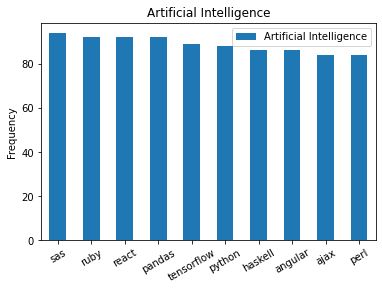

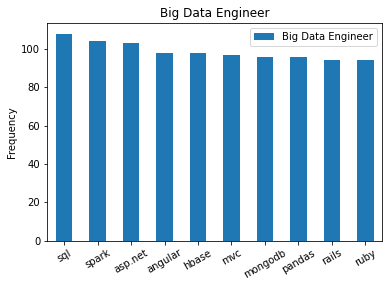

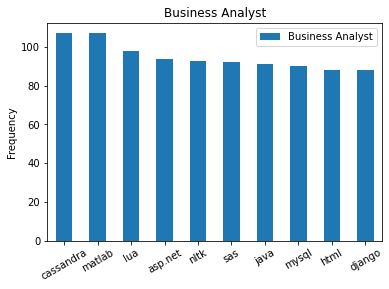

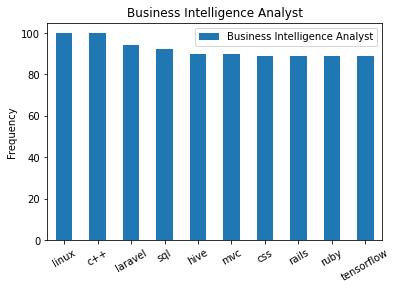

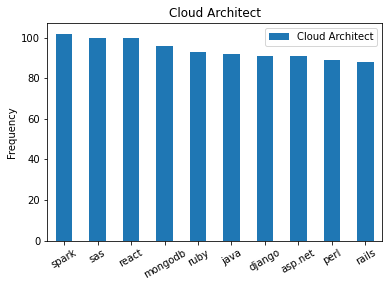

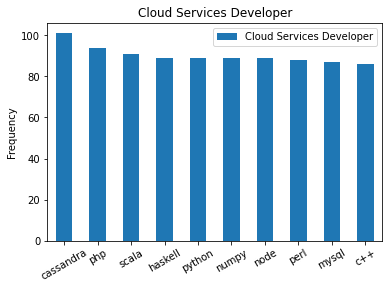

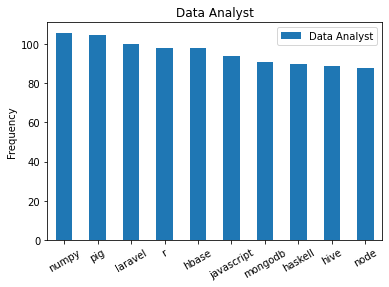

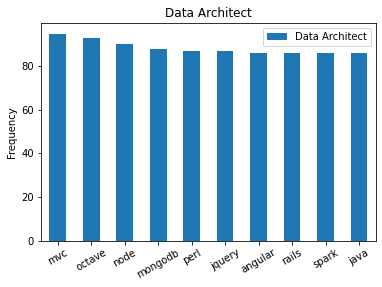

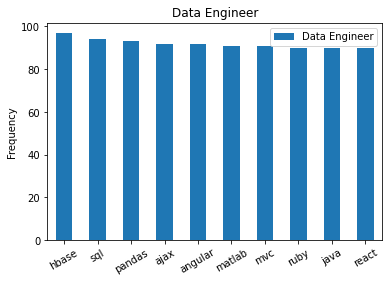

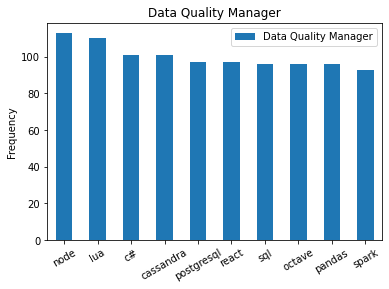

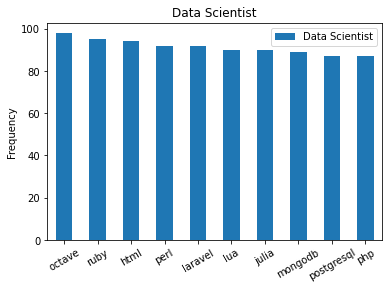

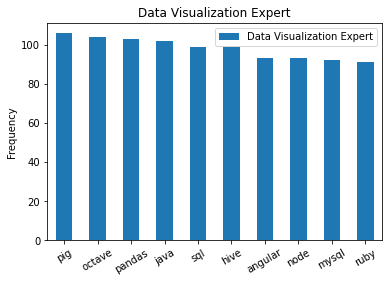

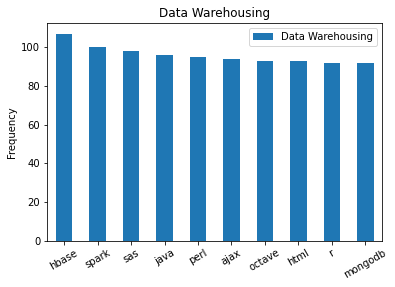

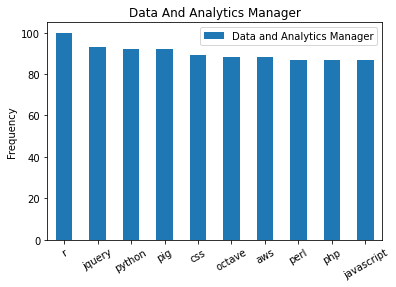

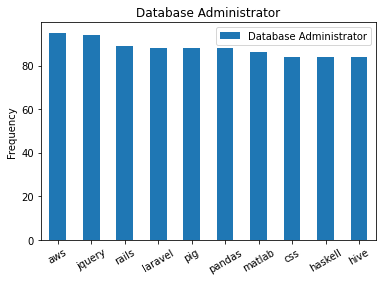

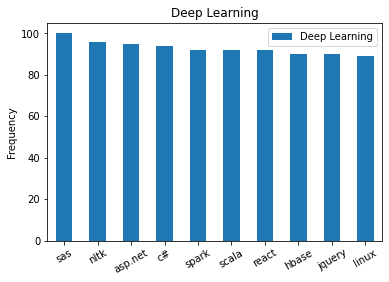

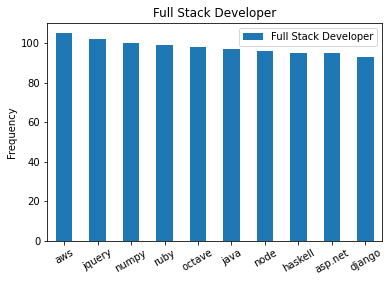

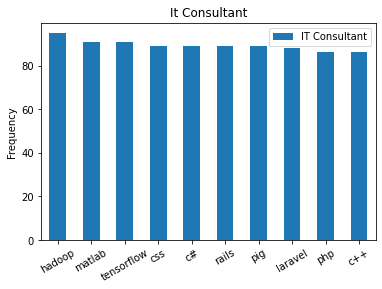

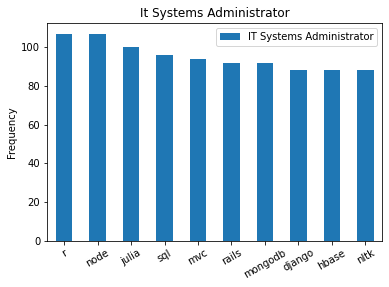

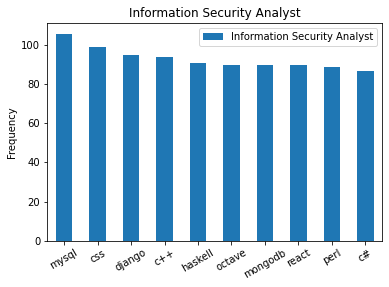

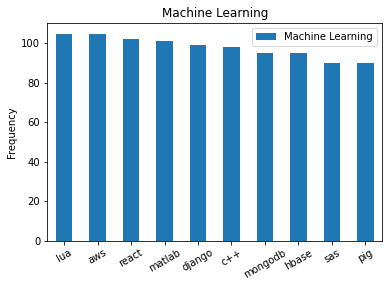

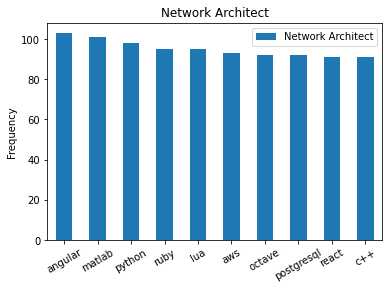

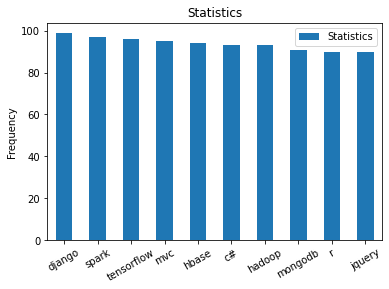

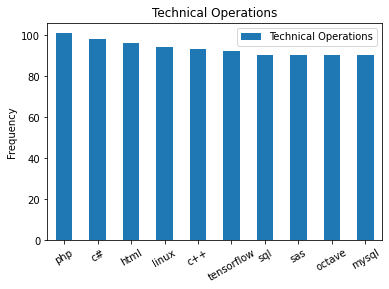

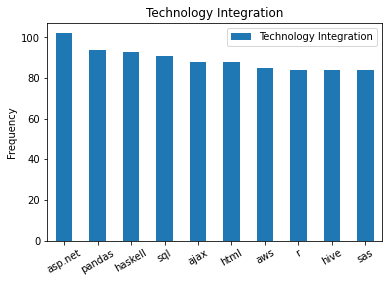

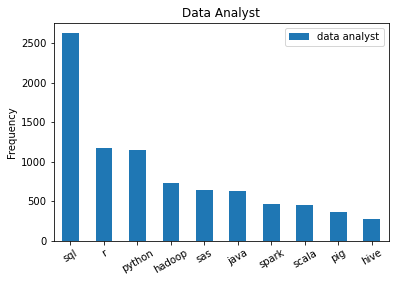

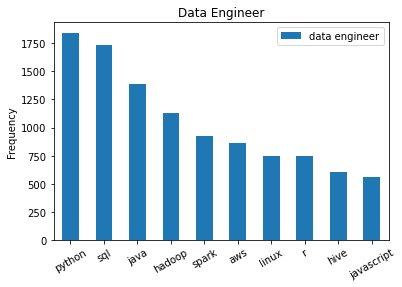

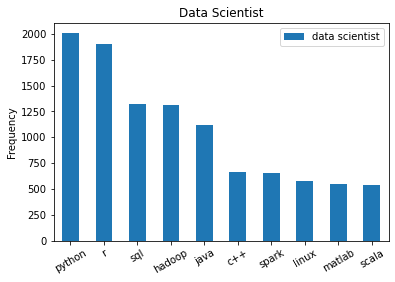

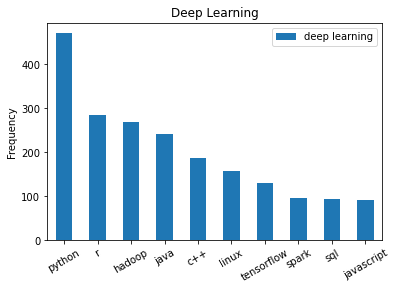

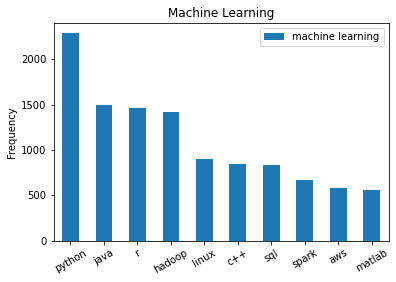

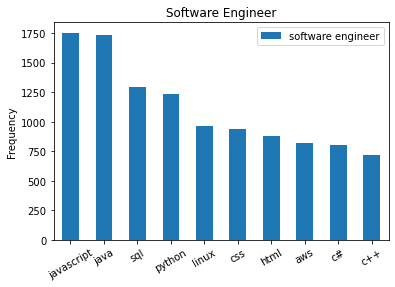

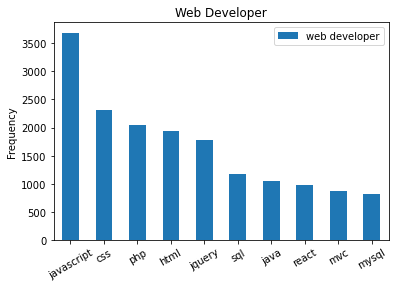

In [51]:
# Displaying the top 10 skills for each role 
groups = visualize_data_set.groupby('Profile').sum()
for index, row in groups.iterrows():
    demandskills=row.nlargest(n=10, keep='first')
    data=pd.DataFrame(demandskills).T
    data=data.T
    data.plot(kind="bar")
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)
    plt.title(index.title())
    plt.show()

In [52]:
# displaying the count of each role
visualize_data_set.groupby('Profile').count()

,css,r,haskell,c#,ajax,sql,python,angular,perl,hive,...,tensorflow,hbase,asp.net,julia,react,c++,jquery,pig,pandas,nltk
Profile,,,,,,,,,,,,,,,,,,,,,
Artificial Intelligence,782,782,782,782,782,782,782,782,782,782,...,782,782,782,782,782,782,782,782,782,782
Big Data Engineer,837,837,837,837,837,837,837,837,837,837,...,837,837,837,837,837,837,837,837,837,837
Business Analyst,796,796,796,796,796,796,796,796,796,796,...,796,796,796,796,796,796,796,796,796,796
Business Intelligence Analyst,805,805,805,805,805,805,805,805,805,805,...,805,805,805,805,805,805,805,805,805,805
Cloud Architect,787,787,787,787,787,787,787,787,787,787,...,787,787,787,787,787,787,787,787,787,787
Cloud Services Developer,779,779,779,779,779,779,779,779,779,779,...,779,779,779,779,779,779,779,779,779,779
Data Analyst,813,813,813,813,813,813,813,813,813,813,...,813,813,813,813,813,813,813,813,813,813
Data Architect,770,770,770,770,770,770,770,770,770,770,...,770,770,770,770,770,770,770,770,770,770
Data Engineer,795,795,795,795,795,795,795,795,795,795,...,795,795,795,795,795,795,795,795,795,795


In [58]:
# traning SVM, Guassian Naive bayes, Multinomial Naive Bayes, KNN, Decision Tree, Multi layer Perceptron, and Random Forest.
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor

models = [
    GaussianNB(),
    MultinomialNB(),
#     ComplementNB(),
#     BernoulliNB(),
    svm.SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier(activation="relu", solver="sgd", batch_size=100, learning_rate_init=0.01, learning_rate="invscaling", alpha=1e-5, hidden_layer_sizes=(100, 200), random_state=1, max_iter=1000),
    RandomForestClassifier(n_estimators = 10, random_state = 42)
]

model_names = [
    "Naive Bayes",
    "Naive Bayes (With Smoothing)",
    "SVM",
    "K Nearest Neighbors",
    "Decision Trees",
    "Neural Networks",
    "Random Forest"
]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for model in models:
        print("model : ", model)
        model.fit(X_train, y_train)

TRAIN: 34212 TEST: 8554
model :  GaussianNB()
model :  MultinomialNB()
model :  SVC()
model :  KNeighborsClassifier()
model :  DecisionTreeClassifier()
model :  MLPClassifier(alpha=1e-05, batch_size=100, hidden_layer_sizes=(100, 200),
              learning_rate='invscaling', learning_rate_init=0.01,
              max_iter=1000, random_state=1, solver='sgd')
model :  RandomForestClassifier(n_estimators=10, random_state=42)


                               precision    recall  f1-score   support

               Data Scientist       0.07      0.01      0.02       156
                deep learning       0.04      0.02      0.03       168
 Information Security Analyst       0.05      0.03      0.04       159
                Deep Learning       0.02      0.01      0.01       161
                IT Consultant       0.04      0.02      0.03       157
         Technical Operations       0.04      0.01      0.02       156
                Data Engineer       0.05      0.03      0.04       163
Business Intelligence Analyst       0.00      0.00      0.00       154
               Data Architect       0.00      0.00      0.00       159
     Cloud Services Developer       0.05      0.02      0.03       170
             machine learning       0.00      0.00      0.00       158
              Cloud Architect       0.03      0.03      0.03       162
                web developer       0.07      0.03      0.04       161
     

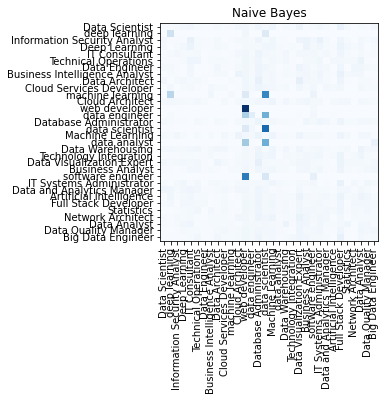

                               precision    recall  f1-score   support

               Data Scientist       0.02      0.01      0.01       156
                deep learning       0.02      0.02      0.02       168
 Information Security Analyst       0.05      0.04      0.05       159
                Deep Learning       0.02      0.01      0.01       161
                IT Consultant       0.03      0.02      0.02       157
         Technical Operations       0.05      0.03      0.03       156
                Data Engineer       0.04      0.04      0.04       163
Business Intelligence Analyst       0.00      0.00      0.00       154
               Data Architect       0.03      0.01      0.01       159
     Cloud Services Developer       0.04      0.04      0.04       170
             machine learning       0.03      0.01      0.02       158
              Cloud Architect       0.03      0.03      0.03       162
                web developer       0.04      0.02      0.02       161
     

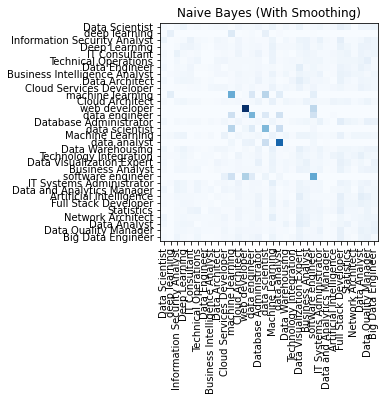

                               precision    recall  f1-score   support

               Data Scientist       0.05      0.03      0.04       156
                deep learning       0.05      0.06      0.05       168
 Information Security Analyst       0.03      0.03      0.03       159
                Deep Learning       0.03      0.02      0.03       161
                IT Consultant       0.04      0.04      0.04       157
         Technical Operations       0.01      0.01      0.01       156
                Data Engineer       0.03      0.04      0.03       163
Business Intelligence Analyst       0.03      0.02      0.02       154
               Data Architect       0.03      0.01      0.02       159
     Cloud Services Developer       0.02      0.04      0.03       170
             machine learning       0.02      0.01      0.02       158
              Cloud Architect       0.05      0.07      0.06       162
                web developer       0.05      0.04      0.05       161
     

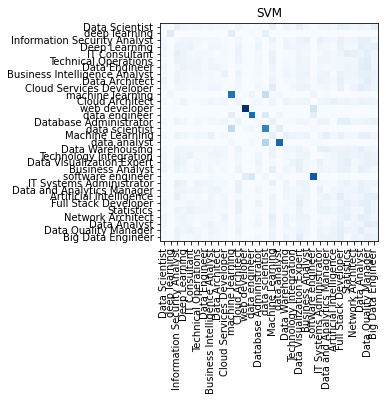

                               precision    recall  f1-score   support

               Data Scientist       0.03      0.09      0.05       156
                deep learning       0.04      0.09      0.05       168
 Information Security Analyst       0.03      0.06      0.04       159
                Deep Learning       0.03      0.06      0.04       161
                IT Consultant       0.03      0.04      0.04       157
         Technical Operations       0.04      0.04      0.04       156
                Data Engineer       0.04      0.04      0.04       163
Business Intelligence Analyst       0.06      0.05      0.05       154
               Data Architect       0.07      0.04      0.05       159
     Cloud Services Developer       0.04      0.03      0.03       170
             machine learning       0.05      0.03      0.03       158
              Cloud Architect       0.01      0.01      0.01       162
                web developer       0.04      0.02      0.03       161
     

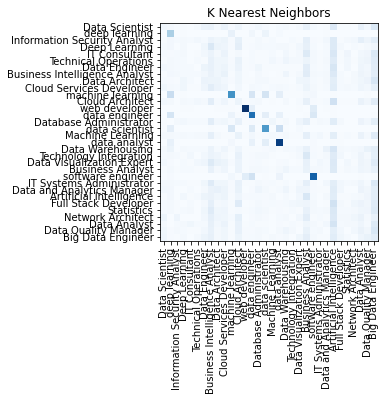

                               precision    recall  f1-score   support

               Data Scientist       0.04      0.04      0.04       156
                deep learning       0.02      0.02      0.02       168
 Information Security Analyst       0.03      0.03      0.03       159
                Deep Learning       0.02      0.02      0.02       161
                IT Consultant       0.05      0.04      0.05       157
         Technical Operations       0.04      0.04      0.04       156
                Data Engineer       0.04      0.04      0.04       163
Business Intelligence Analyst       0.05      0.06      0.06       154
               Data Architect       0.02      0.02      0.02       159
     Cloud Services Developer       0.05      0.05      0.05       170
             machine learning       0.07      0.06      0.06       158
              Cloud Architect       0.04      0.04      0.04       162
                web developer       0.05      0.04      0.05       161
     

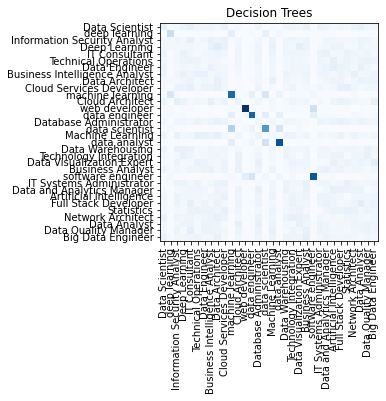

                               precision    recall  f1-score   support

               Data Scientist       0.00      0.00      0.00       156
                deep learning       0.00      0.00      0.00       168
 Information Security Analyst       0.03      0.01      0.01       159
                Deep Learning       0.00      0.00      0.00       161
                IT Consultant       0.00      0.00      0.00       157
         Technical Operations       0.05      0.01      0.01       156
                Data Engineer       0.03      0.06      0.04       163
Business Intelligence Analyst       0.03      0.01      0.01       154
               Data Architect       0.06      0.10      0.07       159
     Cloud Services Developer       0.00      0.00      0.00       170
             machine learning       0.25      0.01      0.01       158
              Cloud Architect       0.00      0.00      0.00       162
                web developer       0.05      0.02      0.03       161
     

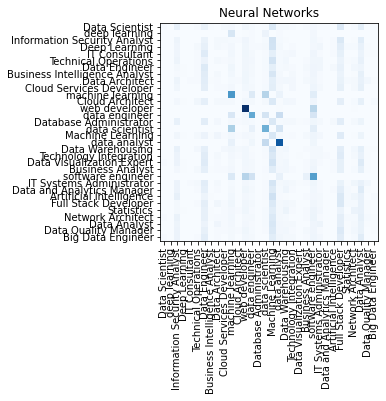

                               precision    recall  f1-score   support

               Data Scientist       0.03      0.04      0.03       156
                deep learning       0.03      0.04      0.04       168
 Information Security Analyst       0.03      0.04      0.03       159
                Deep Learning       0.03      0.04      0.04       161
                IT Consultant       0.02      0.03      0.02       157
         Technical Operations       0.05      0.06      0.06       156
                Data Engineer       0.02      0.02      0.02       163
Business Intelligence Analyst       0.05      0.05      0.05       154
               Data Architect       0.03      0.03      0.03       159
     Cloud Services Developer       0.06      0.06      0.06       170
             machine learning       0.03      0.03      0.03       158
              Cloud Architect       0.03      0.03      0.03       162
                web developer       0.05      0.04      0.04       161
     

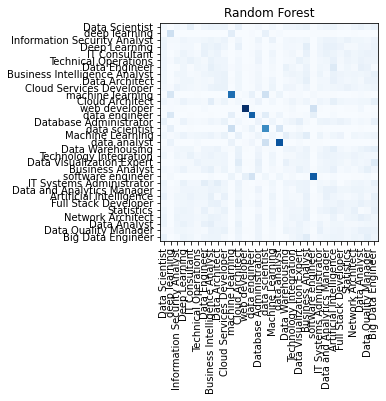

In [59]:
# testing with all classfication models and displaying results
labels = list(set(y))
model_accuracy = []
model_train_accuracy = []

for i in range(len(models)):
    y_pred = models[i].predict(X_test)
    conf_m = confusion_matrix(y_test, y_pred, labels=labels)
    conf_m = pd.DataFrame(index=labels, columns=labels, data=np.zeros((len(labels), len(labels))))
    
    accuracy = 0
    
    for j in range(len(y_pred)):
        if y_test[j] == y_pred[j]:
            accuracy += 1
        
        conf_m.loc[y_test[j], y_pred[j]] += 1
    
    for label in labels:
        conf_m[label] /= len(y_test[y_test==label])
    
    accuracy = accuracy * 100 / len(y_pred)
    model_accuracy.append(accuracy_score(y_test, y_pred) * 100)
    
    
    print(classification_report(y_test, y_pred, target_names=labels))
    
    plt.title(model_names[i])
    plt.imshow(conf_m, cmap="Blues")
    plt.xticks([k for k in range(len(labels))], labels, rotation='vertical')
    plt.yticks([k for k in range(len(labels))], labels)
    plt.show()

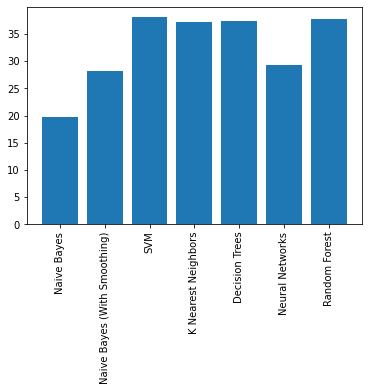

In [60]:
# displaying the accuracies of models as bar graph
plt.bar(model_names, model_accuracy)
# plt.bar(model_names, model_train_accuracy)
plt.xticks([i for i in range(len(models))], model_names, rotation='vertical')
# plt.ylim([12, 68])
plt.show()

In [61]:
# dividing the data set overall to train and test
mask = np.random.rand(len(visualize_data_set)) < 0.8
overall_set=visualize_data_set.copy()
train_overall = overall_set[mask]
test_overall_X = overall_set[~mask]
train_overall_y = train_overall['Profile']
del train_overall['Profile']  
train_overall_X = train_overall.to_numpy()
test_overall_y = test_overall_X['Profile']
del test_overall_X['Profile']

In [62]:
# as per results, it is observed that SVM and random forest seem appropriate models to train the given data
# below we are computing the accuracy on overall set and within each role with SVM as the classifier
# even the though the overall accuracy is low, the accuracy within each class is significantly high, this may be because
# the skills are repeating across all the roles.

classifier = svm.SVC()
classifier = classifier.fit(train_overall_X, train_overall_y)  # Feeding training data to the classifier
predictions = classifier.predict(test_overall_X.to_numpy())

print("Overall set")
print(accuracy_score(test_overall_y, predictions)*100,"%")

Overall set
37.08185053380783 %


In [63]:
# displaying th profile roles
i=0
profiles=list(set(list(visualize_data_set['Profile'])))
print(profiles)
print(len(profiles))

['Data Scientist', 'deep learning', 'Information Security Analyst', 'Deep Learning', 'IT Consultant', 'Technical Operations', 'Data Engineer', 'Business Intelligence Analyst', 'Data Architect', 'Cloud Services Developer', 'machine learning', 'Cloud Architect', 'web developer', 'data engineer', 'Database Administrator', 'data scientist', 'Machine Learning', 'data analyst', 'Data Warehousing', 'Technology Integration', 'Data Visualization Expert', 'Business Analyst', 'software engineer', 'IT Systems Administrator', 'Data and Analytics Manager', 'Artificial Intelligence', 'Full Stack Developer', 'Statistics', 'Network Architect', 'Data Analyst', 'Data Quality Manager', 'Big Data Engineer']
32


In [64]:
# function to train, test and display accuracy within each role
def accuracy_for_each_role(dataset, target_query):
    dataset[target_query] = dataset['Profile'].apply(lambda x: int(target_query == x))
    del dataset['Profile']
    train_set = dataset[mask]
    test_set_X = dataset[~mask]
    train_set_y = train_set[target_query]
    del train_set[target_query] 
    train_set_X = train_set.to_numpy()
    test_set_y = test_set_X[target_query]
    del test_set_X[target_query] 

    classifier = svm.SVC()
    classifier = classifier.fit(train_set_X, train_set_y)  # Feeding training data to the classifier
    predictions = classifier.predict(test_set_X.to_numpy())

    print(target_query)
    print(accuracy_score(test_set_y, predictions)*100,"%")  
    

In [65]:
# function to train, test and display accuracy within each role
for i in range(len(profiles)):
    role_set=visualize_data_set.copy()
    target_query=profiles[i]
    accuracy_for_each_role(role_set,target_query) 

Data Scientist
98.43416370106762 %
deep learning
98.48161328588375 %
Information Security Analyst
98.09015421115065 %
Deep Learning
98.04270462633453 %
IT Consultant
97.99525504151839 %
Technical Operations
98.07829181494661 %
Data Engineer
98.00711743772243 %
Business Intelligence Analyst
98.17319098457888 %
Data Architect
98.30367734282325 %
Cloud Services Developer
98.38671411625148 %
machine learning
94.72123368920522 %
Cloud Architect
98.33926453143536 %
web developer
96.70225385527877 %
data engineer
94.81613285883749 %
Database Administrator
98.19691577698694 %
data scientist
93.96204033214708 %
Machine Learning
97.93594306049822 %
data analyst
96.1091340450771 %
Data Warehousing
98.38671411625148 %
Technology Integration
98.18505338078292 %
Data Visualization Expert
97.99525504151839 %
Business Analyst
98.00711743772243 %
software engineer
94.36536180308423 %
IT Systems Administrator
98.30367734282325 %
Data and Analytics Manager
98.06642941874259 %
Artificial Intelligence
97.9